In [27]:
import nltk
nltk.download("stopwords")
nltk.download("punkt_tab")
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
 corpus = input(f"enter the paragraph for the bag of models: ")

enter the paragraph for the bag of models: Hritik Rakesh Nagrath, known professionally as Hrithik Roshan is an Indian actor who works in Hindi cinema. He has portrayed a variety of characters and is known for his dancing skills. One of the highest-paid actors in India, he has won many awards, including six Filmfare Awards, of which four were for Best Actor


In [7]:
print(corpus)

Hritik Rakesh Nagrath, known professionally as Hrithik Roshan is an Indian actor who works in Hindi cinema. He has portrayed a variety of characters and is known for his dancing skills. One of the highest-paid actors in India, he has won many awards, including six Filmfare Awards, of which four were for Best Actor


In [10]:
# Preprocessing the sentences (converting to lower, alphabet, numerical values and spacing)
sentences = sent_tokenize(corpus)
for i in range(len(sentences)):
  sentences[i] = sentences[i].lower()
  sentences[i] = re.sub('\W', " ", sentences[i])
  sentences[i] = re.sub('\s+', " ", sentences[i])

In [11]:
# Creating a word2vector
word2vector = {}

for sentence in sentences:
  words = word_tokenize(sentence)
  for word in words:
    if word in word2vector:
      word2vector[word] += 1
    else:
      word2vector[word] = 1

print("words to vector:", word2vector)

words to vector: {'hritik': 1, 'rakesh': 1, 'nagrath': 1, 'known': 2, 'professionally': 1, 'as': 1, 'hrithik': 1, 'roshan': 1, 'is': 2, 'an': 1, 'indian': 1, 'actor': 2, 'who': 1, 'works': 1, 'in': 2, 'hindi': 1, 'cinema': 1, 'he': 2, 'has': 2, 'portrayed': 1, 'a': 1, 'variety': 1, 'of': 3, 'characters': 1, 'and': 1, 'for': 2, 'his': 1, 'dancing': 1, 'skills': 1, 'one': 1, 'the': 1, 'highest': 1, 'paid': 1, 'actors': 1, 'india': 1, 'won': 1, 'many': 1, 'awards': 2, 'including': 1, 'six': 1, 'filmfare': 1, 'which': 1, 'four': 1, 'were': 1, 'best': 1}


In [14]:
stop_words = set(stopwords.words("english"))
filtered_vector = {}

for key, value in word2vector.items():
  if key not in stop_words:
    filtered_vector[key] = value

print(filtered_vector)

{'hritik': 1, 'rakesh': 1, 'nagrath': 1, 'known': 2, 'professionally': 1, 'hrithik': 1, 'roshan': 1, 'indian': 1, 'actor': 2, 'works': 1, 'hindi': 1, 'cinema': 1, 'portrayed': 1, 'variety': 1, 'characters': 1, 'dancing': 1, 'skills': 1, 'one': 1, 'highest': 1, 'paid': 1, 'actors': 1, 'india': 1, 'many': 1, 'awards': 2, 'including': 1, 'six': 1, 'filmfare': 1, 'four': 1, 'best': 1}


In [18]:
# creating the dataframe
df = pd.DataFrame(list(filtered_vector.items()), columns=['words', 'counts'])
print(df)

             words  counts
0           hritik       1
1           rakesh       1
2          nagrath       1
3            known       2
4   professionally       1
5          hrithik       1
6           roshan       1
7           indian       1
8            actor       2
9            works       1
10           hindi       1
11          cinema       1
12       portrayed       1
13         variety       1
14      characters       1
15         dancing       1
16          skills       1
17             one       1
18         highest       1
19            paid       1
20          actors       1
21           india       1
22            many       1
23          awards       2
24       including       1
25             six       1
26        filmfare       1
27            four       1
28            best       1


In [17]:
df.sort_values(by='counts', ascending=False)[:10]

,words,counts
3,known,2
8,actor,2
23,awards,2
2,nagrath,1
0,hritik,1
4,professionally,1
5,hrithik,1
6,roshan,1
7,indian,1
9,works,1


Top 10 most frequent words: ['of', 'known', 'is', 'actor', 'in', 'he', 'has', 'for', 'awards', 'hritik']


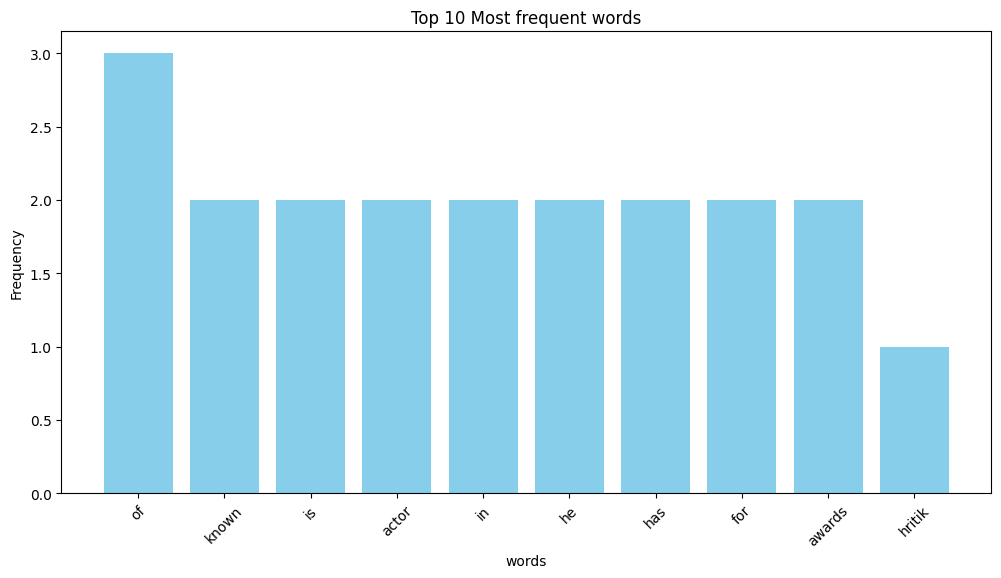

In [24]:
import heapq
import matplotlib.pylab as plt

freq_words = heapq.nlargest(10, word2vector, key=word2vector.get)
print("Top 10 most frequent words:", freq_words)

top_words = sorted(word2vector.items(), key=lambda x : x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Top 10 Most frequent words")
plt.xlabel("words")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'counts')

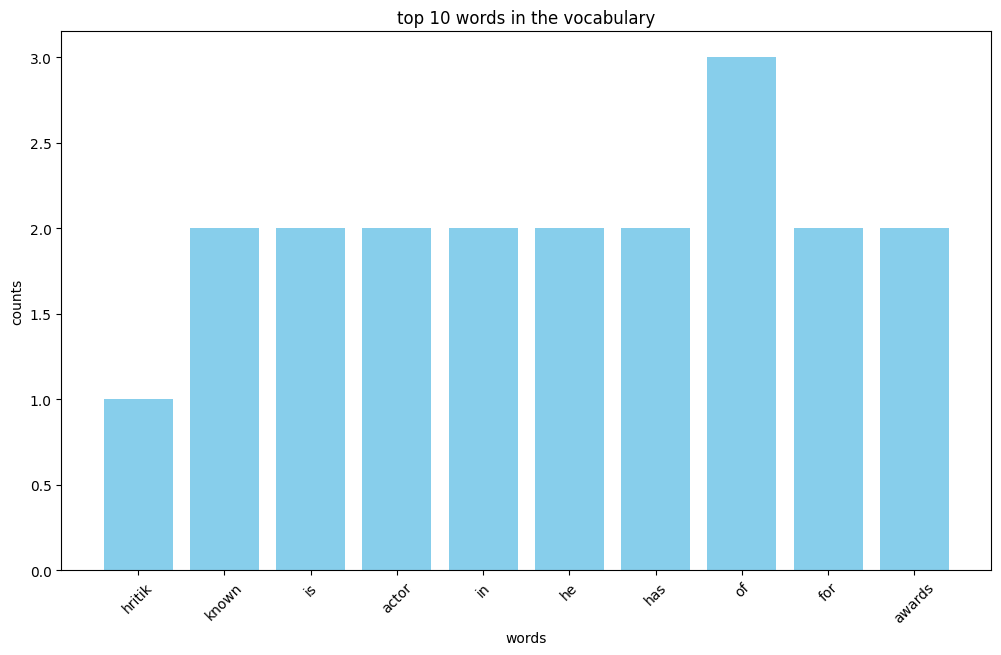

In [26]:
keys = []
values = []
for key, value in word2vector.items():
  if key in freq_words:
    keys.append(key)
    values.append(value)

plt.figure(figsize=(12, 7))
plt.bar(keys, values, color="skyblue")
plt.xticks(rotation=45)
plt.title("top 10 words in the vocabulary")
plt.xlabel("words")
plt.ylabel("counts")

In [37]:
# creating bag of words
X = []

for sentence in sentences:
  vector = []
  words = word_tokenize(sentence)
  for word in freq_words:
    if word in words:
      vector.append(1)
    else:
      vector.append(0)
  X.append(vector)

X = np.array(X)
print(X)

[[0 1 1 1 1 0 0 0 0 1]
 [1 1 1 0 0 1 1 1 0 0]
 [1 0 0 1 1 1 1 1 1 0]]


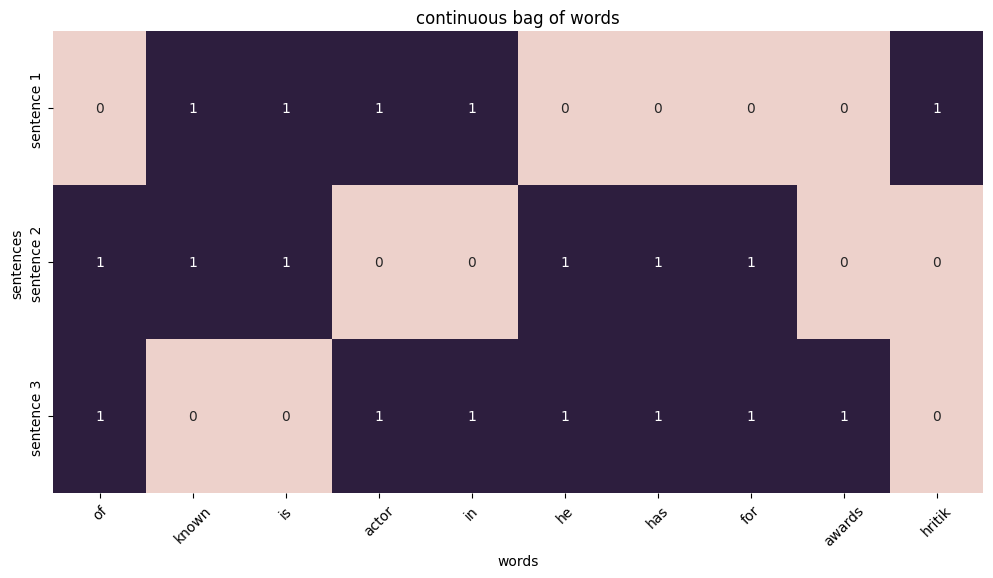

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(X, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"sentence {i+1}" for i in range(len(sentences))])

plt.title("continuous bag of words")
plt.xlabel("words")
plt.xticks(rotation=45)
plt.ylabel("sentences")
plt.show()